# Data Overview Code

The goal of this code is to get some key metrics to describe the data quantitatively. This may be important in future research to understand how the colors, aspect ratio or other features may affect the performance of our models.

In [ ]:
import sys
sys.version

'3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]'

In [ ]:
from PIL import Image
import glob

def image_grid(imgs, rows, cols, resize=256):
    assert len(imgs) == rows * cols

    if resize is not None:
        imgs = [img.resize((resize, resize)) for img in imgs]

    w, h = imgs[0].size
    grid_w, grid_h = cols * w, rows * h
    grid = Image.new("RGB", size=(grid_w, grid_h))

    for i, img in enumerate(imgs):
        x = i % cols * w
        y = i // cols * h
        grid.paste(img, box=(x, y))

    return grid

### Display Images

Change the file path below where it states: "/data/". If the images are of a different type change "jpg" to "png" or other as needed.

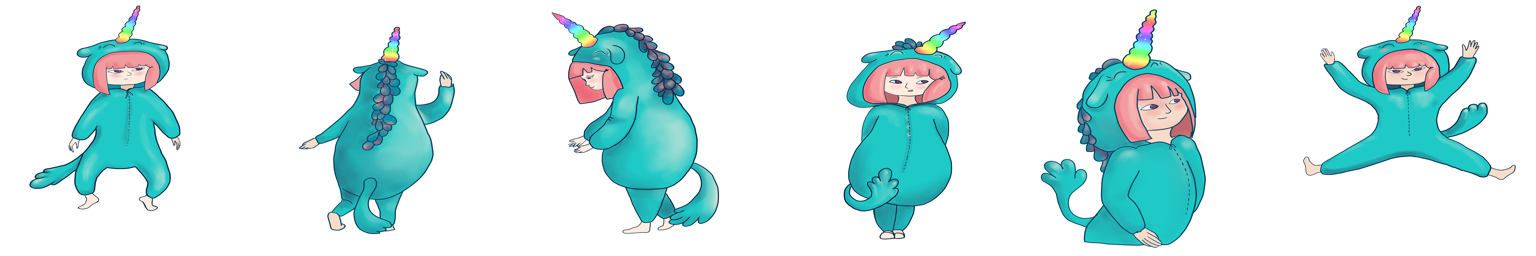

In [ ]:
imgs = [Image.open(path) for path in glob.glob("/data/*.jpg")]
num_imgs_to_preview = min(6, len(imgs))

# Display the images in a grid
image_grid(imgs[:num_imgs_to_preview], 1, num_imgs_to_preview) #.show()

### Image Statistics Table

In [ ]:
import pandas as pd
from PIL import Image
import glob
import numpy as np
import os

# Path to the dataset
dataset_path = "/content/drive/MyDrive/Thesis/personnage/*.jpg"

# Load images
images = [Image.open(path) for path in glob.glob(dataset_path)]

# Initialize lists to store stats
widths = []
heights = []
aspect_ratios = []
file_sizes = []
mean_reds = []
mean_greens = []
mean_blues = []

# Iterate over each image to compute statistics
for image in images:
    # Image dimensions
    width, height = image.size
    widths.append(width)
    heights.append(height)

    # Aspect ratio
    aspect_ratio = width / height
    aspect_ratios.append(aspect_ratio)

    # File size (in bytes)
    path = image.filename
    file_size = os.path.getsize(path)
    file_sizes.append(file_size)

    # Mean color values
    np_image = np.array(image)
    mean_red = np.mean(np_image[:,:,0])
    mean_green = np.mean(np_image[:,:,1])
    mean_blue = np.mean(np_image[:,:,2])
    mean_reds.append(mean_red)
    mean_greens.append(mean_green)
    mean_blues.append(mean_blue)

# Create DataFrame for individual image statistics
image_stats = pd.DataFrame({
    'Filename': [img.filename for img in images],
    'Width': widths,
    'Height': heights,
    'Aspect Ratio': aspect_ratios,
    'File Size (bytes)': file_sizes,
    'Mean Red': mean_reds,
    'Mean Green': mean_greens,
    'Mean Blue': mean_blues
})

# Display individual image statistics
print("Individual Image Statistics:")
image_stats

# Calculate descriptive statistics for each attribute
def descriptive_stats(values):
    stats = {
        'Min': np.min(values),
        'Median': np.median(values),
        'Max': np.max(values),
        'Mean': np.mean(values),
        'Std Deviation': np.std(values),
    }
    return pd.Series(stats)

# Applying descriptive_stats function to each column of image_stats (except 'Filename')
overview_stats = image_stats.drop(columns=['Filename']).apply(descriptive_stats)

# Print overview statistics
print("Overview Statistics:")
overview_stats


Individual Image Statistics:
Overview Statistics:


,Width,Height,Aspect Ratio,File Size (bytes),Mean Red,Mean Green,Mean Blue
Min,1748.0,2480.0,7.048387e-01,407787.000000,198.026857,228.348674,228.692251
Median,1748.0,2480.0,7.048387e-01,467560.500000,212.105496,235.377939,236.085015
Max,1748.0,2480.0,7.048387e-01,586804.000000,219.340844,239.786983,239.827599
Mean,1748.0,2480.0,7.048387e-01,484481.000000,210.446823,234.789445,235.203624
Std Deviation,0.0,0.0,1.110223e-16,63507.409644,6.809536,3.754334,3.651924
